<a href="https://colab.research.google.com/github/chethan6829/chethan6829/blob/main/SALES_FORECASTING_%E2%80%93_FULL_WORKING_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:prophet:n_changepoints greater than number of observations. Using 11.


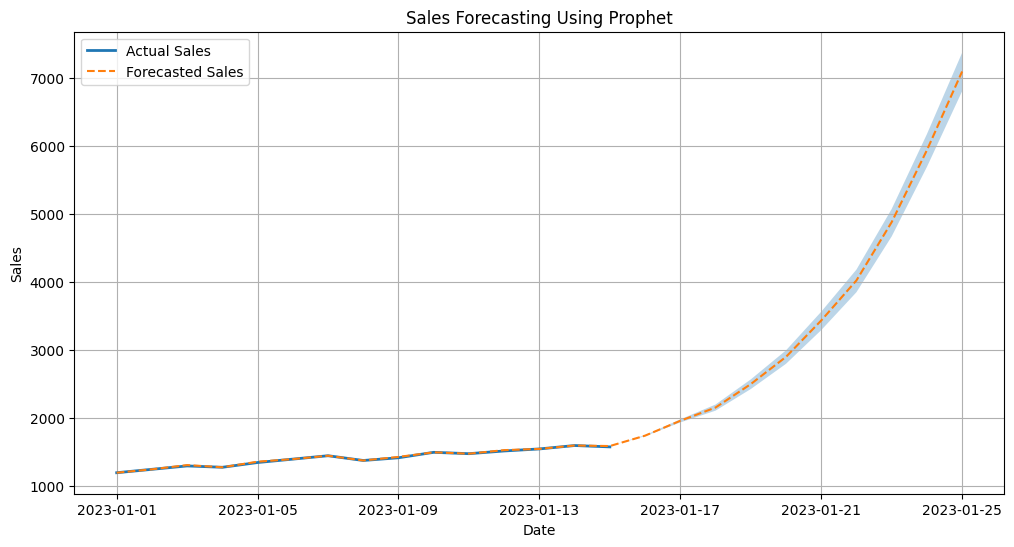


Forecasted Sales (Last 5 Days):
           ds         yhat   yhat_lower   yhat_upper
20 2023-01-21  3438.863755  3297.134641  3567.873496
21 2023-01-22  4028.589062  3854.742409  4187.845344
22 2023-01-23  4885.927539  4675.148913  5078.808602
23 2023-01-24  5944.274874  5697.289766  6179.486085
24 2023-01-25  7101.248665  6811.309914  7377.448269


In [1]:
# =====================================
# SALES FORECASTING – FULL WORKING CODE
# =====================================

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# -------------------------------
# 1. Create CSV Data using Python
# -------------------------------
data_dict = {
    "date": [
        "2023-01-01","2023-01-02","2023-01-03","2023-01-04","2023-01-05",
        "2023-01-06","2023-01-07","2023-01-08","2023-01-09","2023-01-10",
        "2023-01-11","2023-01-12","2023-01-13","2023-01-14","2023-01-15"
    ],
    "sales": [
        1200,1250,1300,1280,1350,
        1400,1450,1380,1420,1500,
        1480,1520,1550,1600,1580
    ],
    "promo": [
        0,0,1,0,1,
        0,0,0,1,0,
        0,1,0,0,1
    ]
}

df = pd.DataFrame(data_dict)

# Save CSV
df.to_csv("sales_data.csv", index=False)

# -------------------------------
# 2. Load CSV
# -------------------------------
df = pd.read_csv("sales_data.csv")
df["date"] = pd.to_datetime(df["date"])

# Prophet format
prophet_df = df.rename(columns={"date": "ds", "sales": "y"})

# -------------------------------
# 3. Build Prophet Model
# -------------------------------
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

model.add_regressor("promo")
model.fit(prophet_df)

# -------------------------------
# 4. Future Forecast
# -------------------------------
future = model.make_future_dataframe(periods=10)
future["promo"] = 0
future.loc[future.index[-3:], "promo"] = 1

forecast = model.predict(future)

# -------------------------------
# 5. Visualization
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(prophet_df["ds"], prophet_df["y"], label="Actual Sales", linewidth=2)
plt.plot(forecast["ds"], forecast["yhat"], "--", label="Forecasted Sales")
plt.fill_between(
    forecast["ds"],
    forecast["yhat_lower"],
    forecast["yhat_upper"],
    alpha=0.3
)

plt.title("Sales Forecasting Using Prophet")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 6. Forecast Output
# -------------------------------
print("\nForecasted Sales (Last 5 Days):")
print(forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail())